In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file into a pandas DataFrame
csv_file_path = 'sensor_data.csv'  # Replace with the actual path to your CSV file

# Example: Read only specific columns from the CSV file
columns_to_read = ['Timestamp', 'EC', 'pH', 'Humidity', 'Air_Temp', 'Water_Temp', 'CO2']
df = pd.read_csv(csv_file_path, usecols=columns_to_read)

# Removing the first 232 rows of data since they were recoreded during preliminary trials
df = df.iloc[232:]

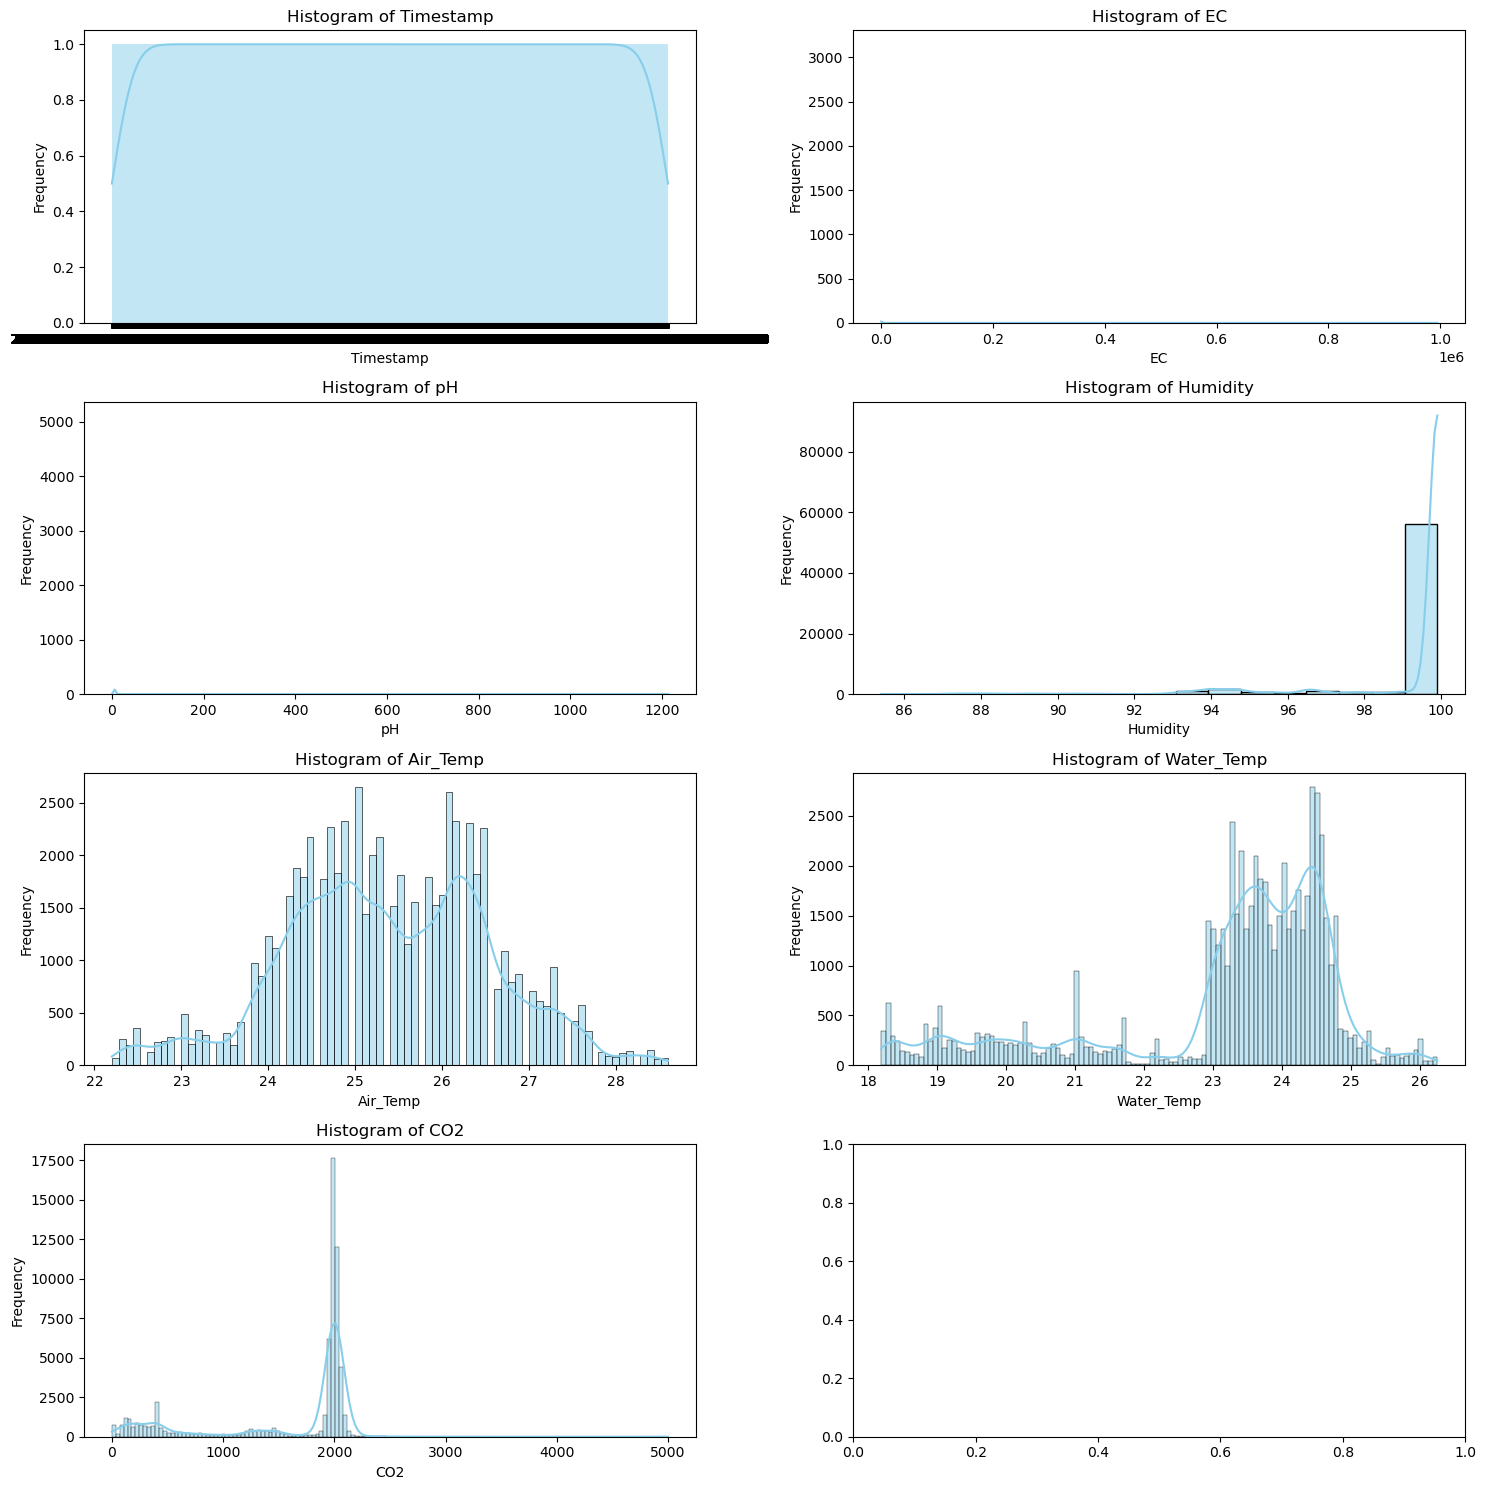

CPU times: total: 34min 24s
Wall time: 34min 22s


In [3]:
%%time

# Plot histograms for each column
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, column in enumerate(df.columns):
    # Choose the color for the histogram bars
    color = 'skyblue'
    
    # Plot histogram
    sns.histplot(df[column], kde=True, color=color, ax=axes[i//2, i%2], bins='auto')
    
    # Set labels and title
    axes[i//2, i%2].set_xlabel(column)
    axes[i//2, i%2].set_ylabel('Frequency')
    axes[i//2, i%2].set_title(f'Histogram of {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [13]:
# Remove rows with NaN values
df = df.dropna()

# Keep rows with pH values between 0 and 14
df = df[(df['pH'] >= 0) & (df['pH'] <= 14)]

# Keep rows with EC values between 100 and 5000
df = df[(df['EC'] >= 100) & (df['EC'] <= 5000)]

In [15]:
df.describe()

,EC,pH,Humidity,Air_Temp,Water_Temp,CO2
count,62047.000000,62047.000000,62047.000000,62047.000000,62047.000000,62047.000000
mean,1043.397894,6.619923,99.316236,25.366972,23.146868,1597.493320
std,95.731647,0.406155,1.875986,1.161975,1.781588,690.854002
min,145.000000,0.000000,85.400000,22.200000,18.190000,0.000000
25%,1001.000000,6.560000,99.900000,24.500000,23.000000,1335.000000
50%,1021.000000,6.660000,99.900000,25.300000,23.690000,1983.000000
75%,1066.000000,6.710000,99.900000,26.200000,24.370000,2013.000000
max,1533.000000,12.590000,99.900000,28.600000,26.250000,5000.000000
